# Solving network flow problems with networkx package
In this tutorial, we will learn how to solve the network flow problems using ```networkx``` python package. Let's start by creating a network first. The details about our network is given below:

### Nodes
1, 2, 3, 4, 5

### Edges
(1, 2), (1, 3), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)

### Costs
(1, 2):4, (1, 3):4, (2, 3):2, (2, 4):2, (2, 5):6, (3, 4): 1, (3, 5):1, (4, 5):2

### Upper bound on the flow (Capacity)
(1, 2):15, (1, 3):8, (2, 3):$\infty$, (2, 4):4, (2, 5):10, (3, 4): 15, (3, 5):4, (4, 5):$\infty$

### Demand
(1, 5): 15, (1, 4): 5


In [1]:
import networkx as nx #improting the package as "nx"

In [2]:
nodes = [1, 2, 3, 4, 5] # Make a list of nodes
links = [(1, 2), (1, 3), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)] # Make a list of links

In [3]:
g = nx.DiGraph() # Initialize the directed graph
g.add_nodes_from(nodes) # Add nodes to the graph from the list we created
g.add_edges_from(links) # Add links from the list we created

In [4]:
#Check if the nodes and links are added by printing them
print(g.nodes)
print(g.edges)

[1, 2, 3, 4, 5]
[(1, 2), (1, 3), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)]


### Drawing graphs

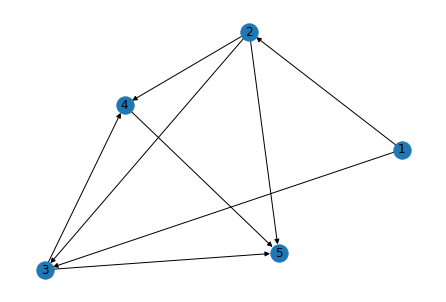

In [6]:
import matplotlib.pyplot as plt # import this package to plot the graph
pos = nx.random_layout(g) # To get the coordinates of nodes
nx.draw(g, with_labels=True, pos=pos) # We specify the graph, position, etc.

## Solving the shortest path problem
First create a dictionary of costs of links and then add it as an attribute to the links of the graph. Use ```g[a][b['cost']``` to add the cost. Then, use ```nx.shortest_path(g, source, target)```  to compute the shortest path in ```g``` from origin/```source``` to the destination/```target```

In [7]:
# Let's add the cost to edges
costs ={(1, 2): 4, (1, 3):4, (2, 3):2, (2, 4):2, (2, 5):6, (3, 4): 1, (3, 5):1, (4, 5):2}
for (a, b) in links:
    g[a][b]['cost'] = costs[a, b] # Adding costs to the edges

In [8]:
p = nx.shortest_path(g, source=1, target = 5, weight = 'cost') # Computes a shortest path in the network 
print('shorest path between ', 1, ' and', 5, ' is:', p) # prints the path

l = nx.shortest_path_length(g, source=1, target = 5, weight = 'cost') # Computes the cost of the shortest path
print('cost of the shorest path between ', 1, ' and', 5, ' is:', l) # prints the cost of the shortest path

p = nx.shortest_path(g) # If you don't specify the source and the destination, 
#then it would compute shortest path betweeen all origins and destinations
# You can access the shorest path using 
print('path between 2 and 5 is: ', p[2][5])

shorest path between  1  and 5  is: [1, 3, 5]
cost of the shorest path between  1  and 5  is: 5
path between 2 and 5 is:  [2, 5]


## Solving the minimum cost flow problem
Similar to costs, create a dictionary of capacity and demand. Then, use ```nx.min_cost_flow(g, demand='demand', capacity='capacity', weight='weight')```. The function returns a dictionary of flow on edges. Total demand to be sent from node 1 is 20. Total demand need to be received at node 4 is 5 and at node 5 is 15.

In [9]:
g.nodes[1]['demand'] = -20 # -ve because this is to be sent.
g.nodes[4]['demand'] = 5 
g.nodes[5]['demand'] = 15

# Let's add the capacity attribute

capacity = {(1, 2):15, (1, 3):8, (2, 3):float("inf"), (2, 4):4, (2, 5):10, (3, 4): 15, (3, 5):4, (4, 5):float("inf")}

for (a, b) in capacity:
    g[a][b]['capacity'] = capacity[a, b] # Adding costs to the edges

flowDict = nx.min_cost_flow(g, demand='demand', capacity='capacity', weight='cost') 

# To print the flow on edges
for (a, b) in g.edges:
    print('The flow on edge ', (a, b), 'is: ', flowDict[a][b])
    

The flow on edge  (1, 2) is:  12
The flow on edge  (1, 3) is:  8
The flow on edge  (2, 3) is:  8
The flow on edge  (2, 4) is:  4
The flow on edge  (2, 5) is:  0
The flow on edge  (3, 4) is:  12
The flow on edge  (3, 5) is:  4
The flow on edge  (4, 5) is:  11


## Solving the maximum flow problem
We are going to use the same capacity values. The function ```nx.maximum_flow(g, origin, destination, capacity='capacity')``` returns the value of maximum flow and the flow on the edges. let's compute the maximum flow that can we can send from node 1 to node 5.

In [10]:
results = nx.maximum_flow(g, 1, 5, capacity='capacity')
print('maximum flow from node 1 to node 5 is:', results[0])

# To print the flow on edges
for (a, b) in g.edges:
    print('The flow on edge ', (a, b), 'is: ', results[1][a][b])

maximum flow from node 1 to node 5 is: 23
The flow on edge  (1, 2) is:  15
The flow on edge  (1, 3) is:  8
The flow on edge  (2, 3) is:  5
The flow on edge  (2, 4) is:  0
The flow on edge  (2, 5) is:  10
The flow on edge  (3, 4) is:  9
The flow on edge  (3, 5) is:  4
The flow on edge  (4, 5) is:  9


## Solving the maximum weight matching problem
Use ```nx.max_weight_matching(g, maxcardinality=True)``` to compute the maximum weight matching problem. ```maxcardinality=True``` helps to find the one that also maximizes the number of edges in the matching. 

In [12]:
print(nx.max_weight_matching(g, maxcardinality=False, weight='cost'))

{(2, 5), (1, 3)}
